In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#魔法函数，显示在页面，而不是窗口
%matplotlib inline 

In [6]:
# feater map的size
size_Y = 16
size_X = 16

# 原始图片到feature map的缩放比
rpn_stride = 8 #8倍的下采样  image_size = 16 * 8
scales = [2, 4, 8]  #锚框的三种尺度(总共三种锚框)（长度）
ratios = [0.5, 1, 2] #每个锚框拥有三种缩放的比例

In [7]:
def anchor_gen(size_X, size_Y, rpn_stride, scales, ratios):
    scales, ratios = np.meshgrid(scales, ratios)        #将每种锚框的边长度和锚框的缩放去展开为3*3的矩阵，结合有9种(scales.shape*ratios.shape)
    scales, ratios = scales.flatten(), ratios.flatten()
    scalesY = scales * np.sqrt(ratios)   #构造成为矩形，所以一个是乘，一个是除，开方是因为这里规定缩放比例是整体的
    scalesX = scales / np.sqrt(ratios)
    
    shiftX = np.arange(0, size_X) * rpn_stride   #恢复为原图的大小
    shiftY = np.arange(0, size_Y) * rpn_stride
    shiftX ,shiftY = np.meshgrid(shiftX, shiftY)
    centerX, anchorX = np.meshgrid(shiftX, scalesX)
    centerY, anchorY = np.meshgrid(shiftY, scalesY)
    
    anchor_center = np.stack([centerY, centerX], axis=2).reshape(-1,2) #axis就是对于指定的位置增加维度，这里就相当于把所有的x,y结合在一起
    anchor_size = np.stack([anchorY, anchorX], axis=2).reshape(-1,2)  #reshape,不管有多少行，都reshape成两列
    boxes = np.concatenate([anchor_center - 0.5 * anchor_size, anchor_center + 0.5 *anchor_size], axis=1) #获取距离中心点宽或者高的两边
    return boxes

In [8]:
anchors = anchor_gen(size_X, size_Y, rpn_stride, scales, ratios)



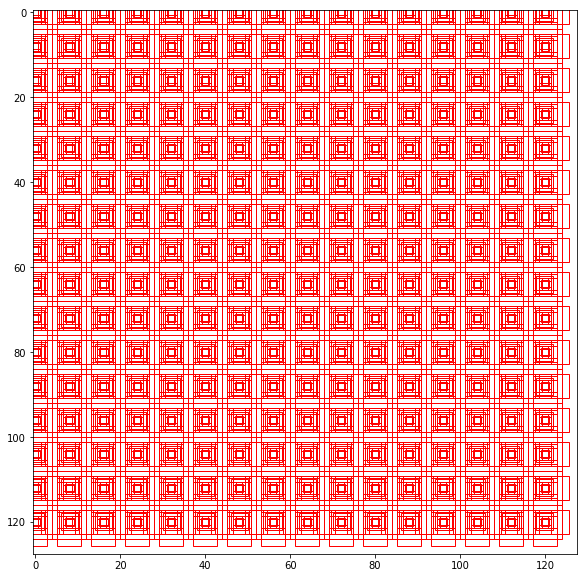

In [9]:
plt.figure(figsize = (10, 10))
img = np.ones((128, 128, 3))

plt.imshow(img)

Axs = plt.gca()

for i in range(anchors.shape[0]):
    box = anchors[i]
    rec = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], edgecolor = 'r', facecolor = 'none')
    Axs.add_patch(rec)